In [1]:
import numpy as np
import pandas as pd
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('combodataset.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'target']

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['sex'] = df.sex.map({'female': 0, 'male': 1})

In [6]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable



In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
lr_pred = model.predict(X_test)

Accuracy: 0.8634453781512605


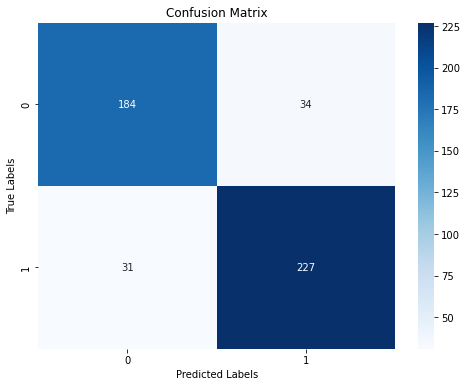

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# SVM

# Linear Kernel

In [12]:
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
svm_l_pred = svm_model.predict(X_test)

Accuracy: 0.8697478991596639


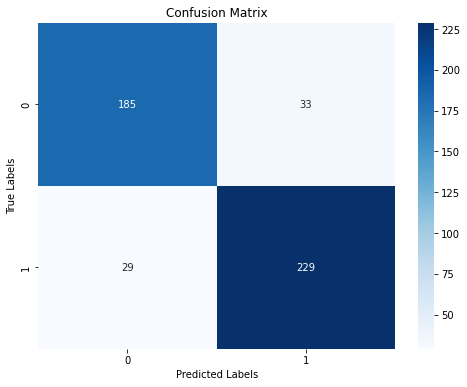

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_l_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_l_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Polynomial Kernel

In [15]:
svm_model = SVC(kernel='poly') 
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [16]:
svm_p_pred = svm_model.predict(X_test)

Accuracy: 0.8823529411764706


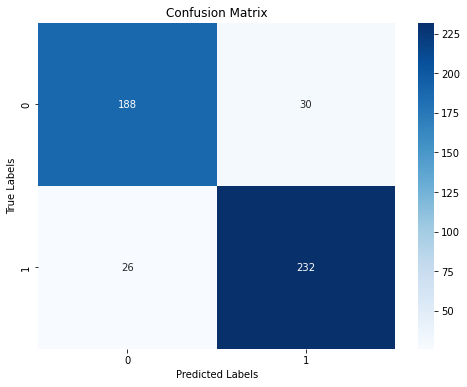

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_p_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_p_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# RBF Kernel

In [18]:
svm_model = SVC(kernel='rbf') 
svm_model.fit(X_train, y_train)

SVC()

In [19]:
svm_r_pred = svm_model.predict(X_test)

Accuracy: 0.8907563025210085


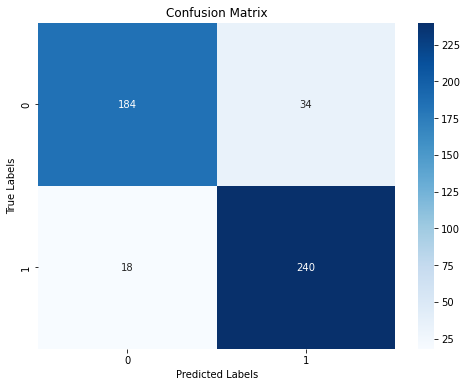

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_r_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_r_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [23]:
nb_pred = nb_classifier.predict(X_test)

Accuracy: 0.8592436974789915


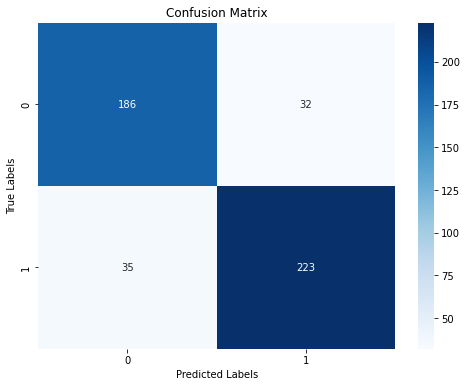

In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, nb_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
dt_predictions = dt_model.predict(X_test)

Accuracy: 0.8634453781512605


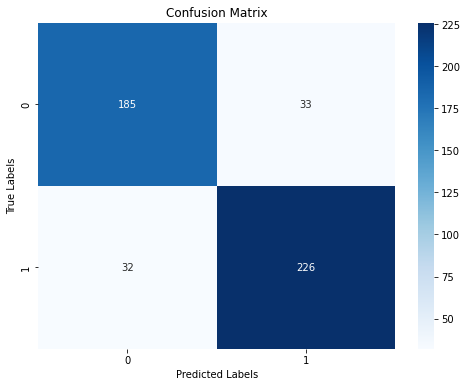

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rf_predictions = rf_model.predict(X_test)


Accuracy: 0.9159663865546218


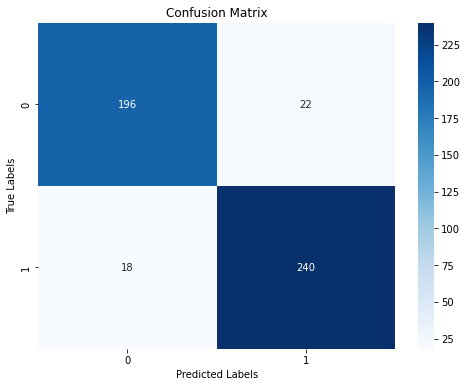

In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# KNN

In [33]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn_model = sklearn.neighbors.KNeighborsClassifier()


In [35]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
knn_predictions = knn_model.predict(X_test)


Accuracy: 0.8592436974789915


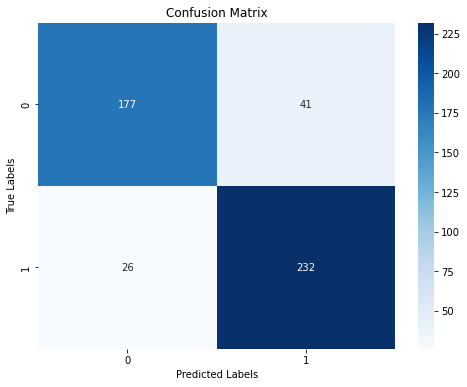

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
gb_predictions = gb_model.predict(X_test)


Accuracy: 0.9054621848739496


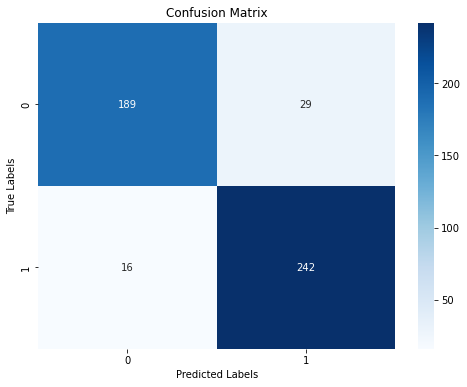

In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, gb_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, gb_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# ELM Classifier

In [42]:
from sklearn_extensions.extreme_learning_machines.elm import ELMClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass neg_label=-1, pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [43]:
elm = ELMClassifier() 
elm.fit(X_train, y_train)

ELMClassifier()

In [44]:
elm_pred = elm.predict(X_test)


Accuracy: 0.8592436974789915


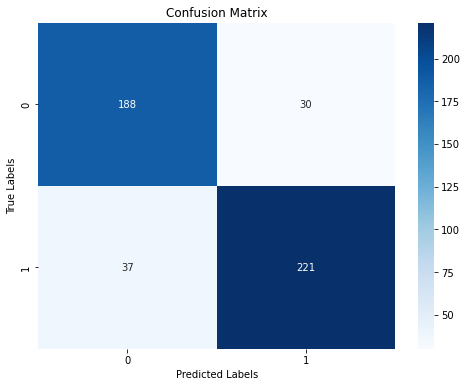

In [45]:
# Calculate accuracy
accuracy = accuracy_score(y_test, elm_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, elm_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Adaboost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Create a base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1)  # Stump

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
adaboost_pred = adaboost_classifier.predict(X_test)



Accuracy: 0.8676470588235294


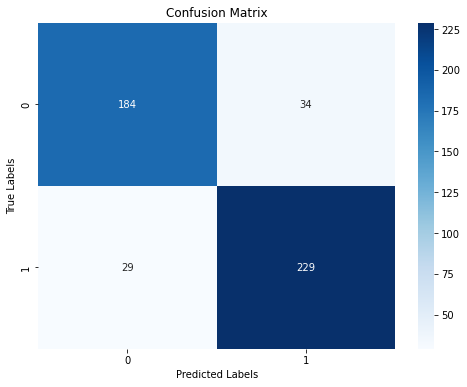

In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test, adaboost_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Ridge Classifier

In [49]:
from sklearn.linear_model import RidgeClassifier

In [50]:
# Create a Ridge Classifier
ridge_classifier = RidgeClassifier(alpha=1.0, random_state=42)  # alpha is the regularization parameter

# Train the Ridge Classifier
ridge_classifier.fit(X_train, y_train)

# Make predictions on the test set
ridge_pred = ridge_classifier.predict(X_test)


Accuracy: 0.8592436974789915


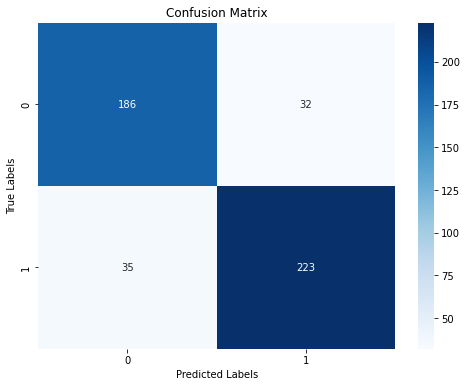

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ridge_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, ridge_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Lasso Classifier

In [52]:
from sklearn.linear_model import Lasso

In [53]:
# Create a Lasso Classifier
lasso_classifier = Lasso(alpha=1.0, random_state=42)  # alpha is the regularization parameter

# Train the Lasso Classifier
lasso_classifier.fit(X_train, y_train)

# Make predictions on the test set
lasso_pred = lasso_classifier.predict(X_test)

# Convert predictions to class labels (for classification)
lasso_pred_class = [round(val) for val in lasso_pred]



Accuracy: 0.542016806722689


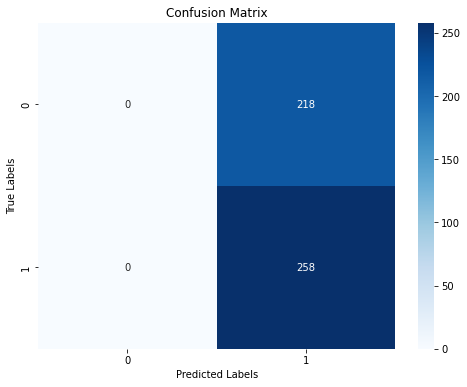

In [54]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lasso_pred_class)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, lasso_pred_class)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Passive Aggressive Classifier

In [55]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [56]:
# Create a Passive-Aggressive Classifier
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=42)  # C is the regularization parameter

# Train the Passive-Aggressive Classifier
pa_classifier.fit(X_train, y_train)

# Make predictions on the test set
pa_pred = pa_classifier.predict(X_test)



Accuracy: 0.8130252100840336


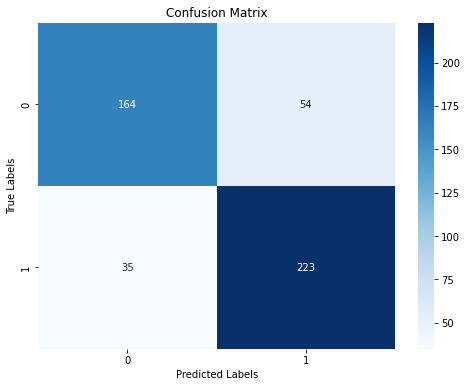

In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, pa_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, pa_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Gaussian Process Classifier

In [58]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


In [59]:
# Create a Gaussian Process Classifier
kernel = 1.0 * RBF(length_scale=1.0)  # Radial basis function (RBF) kernel
gp_classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process Classifier
gp_classifier.fit(X_train, y_train)

# Make predictions on the test set
gp_pred = gp_classifier.predict(X_test)



Accuracy: 0.8970588235294118


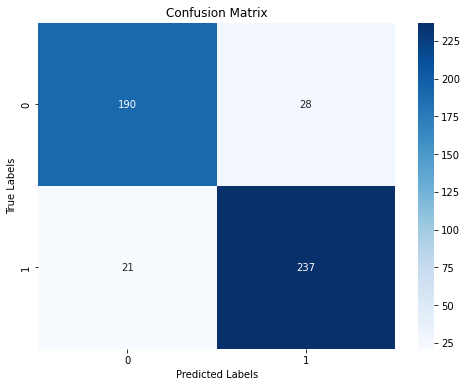

In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, gp_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, gp_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Nearest Centroid Classifier

In [61]:
from sklearn.neighbors import NearestCentroid


In [62]:
# Create a Nearest Centroid Classifier
centroid_classifier = NearestCentroid()

# Train the Nearest Centroid Classifier
centroid_classifier.fit(X_train, y_train)

# Make predictions on the test set
ncc_pred = centroid_classifier.predict(X_test)



Accuracy: 0.8529411764705882


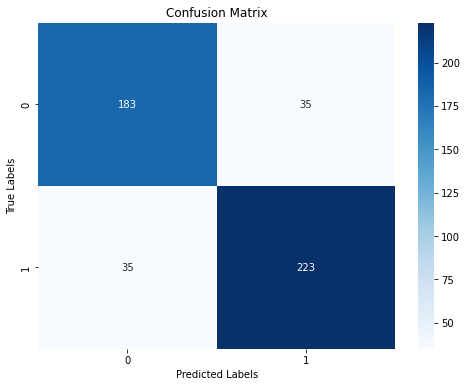

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ncc_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, ncc_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
# Combine predictions using majority voting
ensemble_pred = np.round((lr_pred + svm_l_pred + svm_p_pred + svm_r_pred + rf_predictions + knn_predictions + gb_predictions + adaboost_pred + ridge_pred + gp_pred) / 10)


In [66]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, ensemble_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[193  25]
 [ 21 237]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       218
           1       0.90      0.92      0.91       258

    accuracy                           0.90       476
   macro avg       0.90      0.90      0.90       476
weighted avg       0.90      0.90      0.90       476



In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import cross_val_score

In [68]:
# List of base models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM Linear Kernel", SVC(kernel="linear")),
    ("SVM Polynomial Kernel", SVC(kernel="poly")),
    ("SVM RBF Kernel", SVC(kernel="rbf")),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("Ridge Classifier", RidgeClassifier()),
    ("Gaussian Process Classifier", GaussianProcessClassifier(random_state=42))
]

In [69]:
# Train and validate base models
base_model_predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    base_model_predictions.append(predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.8634
SVM Linear Kernel - Accuracy: 0.8697
SVM Polynomial Kernel - Accuracy: 0.8824
SVM RBF Kernel - Accuracy: 0.8908
Random Forest - Accuracy: 0.9244
KNN - Accuracy: 0.8592
Gradient Boosting - Accuracy: 0.9055
AdaBoost - Accuracy: 0.8739
Ridge Classifier - Accuracy: 0.8592
Gaussian Process Classifier - Accuracy: 0.8887


In [70]:
# Create a meta-classifier (ensemble) for combining predictions
meta_classifier_input = np.array(base_model_predictions).T
meta_classifier = XGBClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_classifier_input, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [71]:
# Evaluate the ensemble on the validation set
ensemble_pred = []
for predictions in base_model_predictions:
    ensemble_pred.append(predictions)
ensemble_pred = np.array(ensemble_pred).T
meta_predictions = meta_classifier.predict(ensemble_pred)


In [72]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, meta_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, meta_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Confusion Matrix:
[[204  14]
 [  7 251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       218
           1       0.95      0.97      0.96       258

    accuracy                           0.96       476
   macro avg       0.96      0.95      0.96       476
weighted avg       0.96      0.96      0.96       476

Ensemble Accuracy: 0.9559


In [73]:
("Logistic Regression", LogisticRegression(max_iter=1000)),
("Ridge Classifier", RidgeClassifier()),
    ("KNN", KNeighborsClassifier()),
        

IndentationError: unexpected indent (Temp/ipykernel_9808/3826365127.py, line 3)

In [74]:
# List of base models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM Linear Kernel", SVC(kernel="linear")),
    ("SVM Polynomial Kernel", SVC(kernel="poly")),
    ("SVM RBF Kernel", SVC(kernel="rbf")),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGB Classifier", XGBClassifier(n_estimators=100, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("Gaussian Process Classifier", GaussianProcessClassifier(random_state=42))
]

In [75]:
# Train and validate base models
base_model_predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    base_model_predictions.append(predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.8634
SVM Linear Kernel - Accuracy: 0.8697
SVM Polynomial Kernel - Accuracy: 0.8824
SVM RBF Kernel - Accuracy: 0.8908
Random Forest - Accuracy: 0.9244
XGB Classifier - Accuracy: 0.9013
KNN - Accuracy: 0.8592
Gradient Boosting - Accuracy: 0.9055
AdaBoost - Accuracy: 0.8739
Gaussian Process Classifier - Accuracy: 0.8887


In [76]:
# Create a meta-classifier (ensemble) for combining predictions
meta_classifier_input = np.array(base_model_predictions).T
meta_classifier = XGBClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_classifier_input, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [77]:
# Evaluate the ensemble on the validation set
ensemble_pred = []
for predictions in base_model_predictions:
    ensemble_pred.append(predictions)
ensemble_pred = np.array(ensemble_pred).T
meta_predictions = meta_classifier.predict(ensemble_pred)


In [78]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, meta_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, meta_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Confusion Matrix:
[[206  12]
 [  7 251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       218
           1       0.95      0.97      0.96       258

    accuracy                           0.96       476
   macro avg       0.96      0.96      0.96       476
weighted avg       0.96      0.96      0.96       476

Ensemble Accuracy: 0.9601


In [79]:
# List of base models

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

svm_l_model = SVC(kernel="linear")
svm_l_model.fit(X_train, y_train)

svm_p_model = SVC(kernel="poly")
svm_p_model.fit(X_train, y_train)

svm_r_model = SVC(kernel="rbf")
svm_r_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

gpc_model = GaussianProcessClassifier(random_state=42)
gpc_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
svm_l_predictions = svm_l_model.predict(X_test)
svm_p_predictions = svm_p_model.predict(X_test)
svm_r_predictions = svm_r_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
ab_predictions = ab_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
gpc_predictions = gpc_model.predict(X_test)


# Combine predictions using ensemble (Voting Classifier)
ensemble_predictions = np.column_stack((lr_predictions, svm_l_predictions, svm_p_predictions, svm_r_predictions, 
                                        rf_predictions, knn_predictions, gb_predictions, 
                                        ab_predictions, xgb_predictions, gpc_predictions))


# Perform majority voting to get the final prediction
final_predictions = np.mean(ensemble_predictions, axis=1) >= 0.5
final_predictions = final_predictions.astype("int32")

# Calculate accuracy of the ensemble
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, final_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Ensemble Accuracy: 0.9055
Confusion Matrix:
[[189  29]
 [ 16 242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       218
           1       0.89      0.94      0.91       258

    accuracy                           0.91       476
   macro avg       0.91      0.90      0.90       476
weighted avg       0.91      0.91      0.91       476

Ensemble Accuracy: 0.9055


In [80]:
X_test.shape

(476, 11)